In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the datasets
df = pd.read_csv("big_mart_data.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
#finding duplicates values
df.duplicated().sum()

0

In [4]:
#Finding missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Handling missing values

In [5]:
#handling Item_Weight column missing values with mean values
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [8]:
#handling Outlet_Size column's missing values with Outlet_Type column's mode values
mode_of_outlet_type = df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
missing_values = df["Outlet_Size"].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [10]:
df.loc[missing_values,"Outlet_Size"]

1       NaN
2       NaN
3       NaN
8       NaN
9       NaN
       ... 
5668    NaN
5670    NaN
5678    NaN
5679    NaN
5680    NaN
Name: Outlet_Size, Length: 1606, dtype: object

In [11]:
df.loc[missing_values,"Outlet_Size"] = df.loc[missing_values,"Outlet_Type"].apply(lambda x: mode_of_outlet_type[x])


In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
df["Outlet_Size"].value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [14]:
df.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [15]:
df.Item_Fat_Content = df.Item_Fat_Content.replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


# Visualization

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

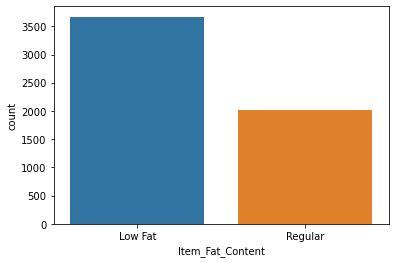

In [17]:

sns.countplot(x="Item_Fat_Content",data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

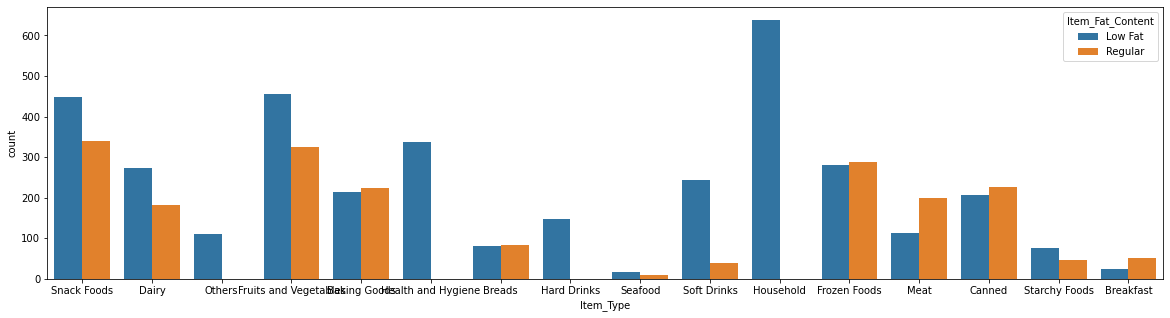

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x="Item_Type",hue="Item_Fat_Content",data=df)

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

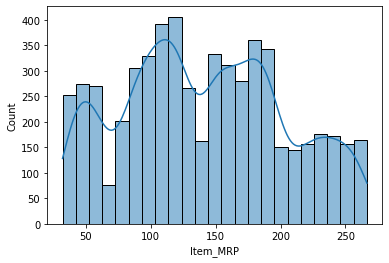

In [20]:
sns.histplot(df["Item_MRP"],kde=True)

<AxesSubplot:>

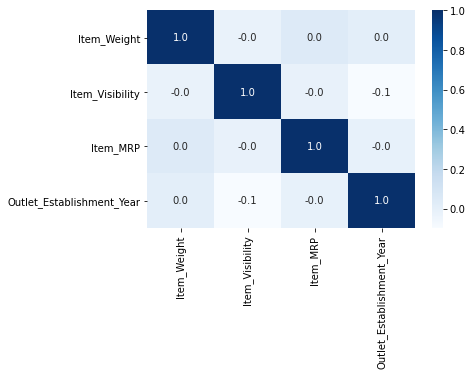

In [21]:
corr = df.corr()
sns.heatmap(corr,annot=True,cbar=True,cmap="Blues",fmt=".1f")

In [22]:
corr['Item_MRP']

Item_Weight                  0.045257
Item_Visibility             -0.014013
Item_MRP                     1.000000
Outlet_Establishment_Year   -0.007233
Name: Item_MRP, dtype: float64

# Encodding categorical columns


In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df["Item_Identifier"] = le.fit_transform(df["Item_Identifier"])


In [27]:
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])

In [28]:
df["Item_Type"] = le.fit_transform(df["Item_Type"])


In [29]:
df["Outlet_Identifier"] = le.fit_transform(df["Outlet_Identifier"])

In [30]:
df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])

In [31]:
df["Outlet_Location_Type"] = le.fit_transform(df["Outlet_Location_Type"])

In [32]:
df["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])

In [33]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1


In [34]:
#Extracting Independent and Dependent variables
x = df.drop(["Item_MRP"],axis=1)
y = df["Item_MRP"]

In [35]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,7,2002,2,1,1
5679,517,15.300000,1,0.000000,3,2,2007,2,1,1


In [36]:
y

0       107.8622
1        87.3198
2       241.7538
3       155.0340
4       234.2300
          ...   
5676    141.3154
5677    169.1448
5678    118.7440
5679    214.6218
5680     79.7960
Name: Item_MRP, Length: 5681, dtype: float64

In [37]:
#Scaling the independent datasets
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit_transform(x)

array([[ 0.73989552,  1.89745979, -0.74081066, ..., -0.66416621,
        -1.369215  , -0.25276858],
       [ 0.65908503, -1.03552991,  1.34987258, ...,  0.79998911,
        -0.1388274 , -0.25276858],
       [ 1.42005049,  0.44863355, -0.74081066, ...,  0.79998911,
         1.0915602 , -1.50799439],
       ...,
       [ 1.43351891, -0.63504136, -0.74081066, ...,  0.79998911,
        -0.1388274 , -0.25276858],
       [-0.57551969,  0.6135406 ,  1.34987258, ...,  0.79998911,
        -0.1388274 , -0.25276858],
       [ 0.47950616, -0.75283211,  1.34987258, ...,  0.79998911,
        -0.1388274 , -0.25276858]])

In [38]:
#Splitting the datasets into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
#training the model to Support Vector Machine
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
#predicting the training dataset result
x_train_pred = model.predict(x_train)

In [41]:
#accuracy of training datasets result

model.score(x_train,y_train)

0.9377724133952619

In [42]:
#r2_score and mean_absulute_error of training datasets
from sklearn.metrics import r2_score,mean_absolute_error

print("R2_Score:",r2_score(y_train,x_train_pred))

print("Mean Absulute Error:",mean_absolute_error(y_train,x_train_pred))

R2_Score: 0.9377724133952619
Mean Absulute Error: 11.485078606572774


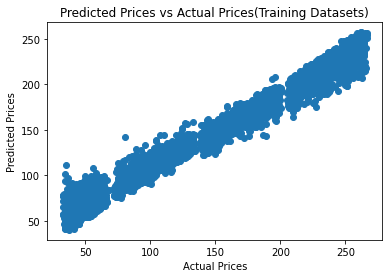

In [43]:
#Visualizing
plt.scatter(y_train,x_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices(Training Datasets)")
plt.show()

In [44]:
#predicting the test datasets result
x_test_pred = model.predict(x_test)


In [45]:
#accuracy of test datasets result

model.score(x_test,y_test)

0.5822093782122999

In [46]:
#r2_score and mean_absulute_error of test datasets
from sklearn.metrics import r2_score,mean_absolute_error

print("R2_Score:",r2_score(y_test,x_test_pred))

print("Mean Absulute Error:",mean_absolute_error(y_test,x_test_pred))

R2_Score: 0.5822093782122999
Mean Absulute Error: 28.828563891625617


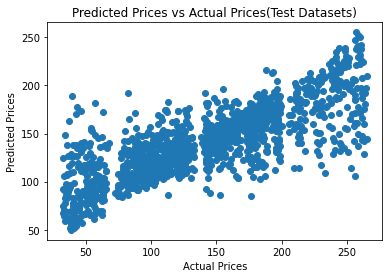

In [47]:
#Visualizing
plt.scatter(y_test,x_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices(Test Datasets)")
plt.show()